# CUSTOMER BEHAVIOUR AND COHORT ANALYSIS
Customer behavior and cohort analysis is a technique used to understand and analyze the patterns and trends in customer behavior over time. It is a powerful tool that can be used to identify key customer segments, understand their behavior, and make data-driven decisions to improve customer engagement and drive business growth. In this analysis, I used a customer dataset that contains information such as customer demographics, purchase history, and other key data points. I then used this data to segment customers based on various factors such as age, gender, and purchase behavior. I also analyzed the retention rate of different customer cohorts, as well as their purchase behavior over time. By understanding customer behavior and cohort analysis, businesses can improve their marketing strategies, personalize their customer engagement, and drive revenue growth.

In [2]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib as plt
fname = Path(r"C:\Users\euzoe\OneDrive\Desktop\DATA_ANALYSIS\DATASETS\Customer.csv")
fname.is_file()


True

In [104]:
customer_df = pd.read_csv(fname)
customer_df['date'] = pd.to_datetime(customer_df['date'], format='%d/%m/%Y')


# Add the lat and long columns

In [111]:

# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="geoapiExercises")

# # Create a new column for the latitude and longitude
# customer_df['lat'] = None
# customer_df['lon'] = None

# # Iterate over the rows of the dataframe
# for i, row in customer_df.iterrows():
#     country = row['country']
#     location = geolocator.geocode(country)
#     if location:
#         customer_df.at[i, 'lat'] = location.latitude
#         customer_df.at[i, 'lon'] = location.longitude


# 1. What is the overall distribution of customers by gender?

Female    250
Male      223
Name: gender, dtype: int64


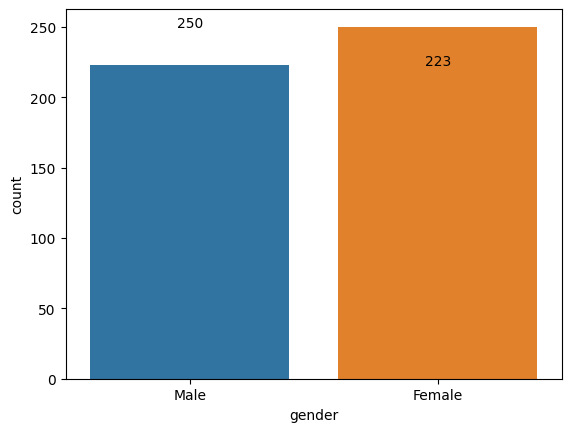

In [113]:
# Distribution of customers by gender
import matplotlib.pyplot as plt

gender_counts = customer_df['gender'].value_counts()
print(gender_counts)

# Visualization of distribution of customers by gender
sns.countplot(x='gender', data=customer_df)
for i in range(len(gender_counts)):
    count = gender_counts[i]
    plt.annotate(count, (i, count), ha='center')
plt.show()

# 2. What is the overall distribution of customers by Age?

17    142
35     24
37     19
18     17
42     16
40     15
27     15
38     14
41     14
39     13
36     12
20     10
28     10
26      9
30      9
48      8
32      8
43      8
47      8
31      8
29      8
46      7
49      6
25      5
59      5
24      5
33      5
58      4
53      4
60      4
52      4
23      4
19      4
56      4
22      4
21      3
34      3
57      3
54      3
55      2
51      2
45      2
16      1
50      1
44      1
Name: age, dtype: int64


C:\Users\euzoe\AppData\Local\Temp\ipykernel_37808\1615675841.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




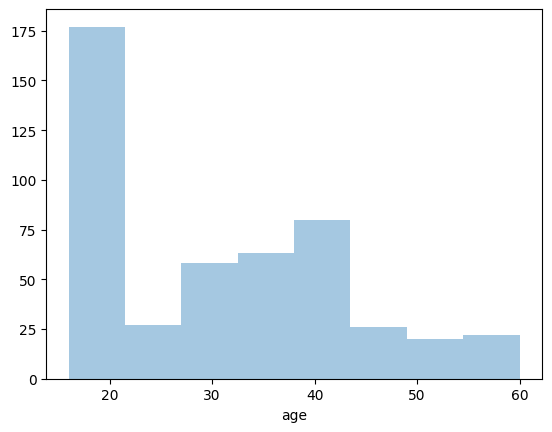

In [114]:
# Distribution of customers by age
age_counts = customer_df['age'].value_counts()
print(age_counts)

# Visualization of distribution of customers by age
sns.distplot(customer_df['age'], kde=False)
plt.show()

# 3. What is the overall distribution of customers by salary?

36000     27
76000     13
43000     12
57000     12
79000     12
          ..
37000      1
123000     1
116000     1
48000      1
139000     1
Name: salary, Length: 118, dtype: int64


C:\Users\euzoe\AppData\Local\Temp\ipykernel_37808\1104301612.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




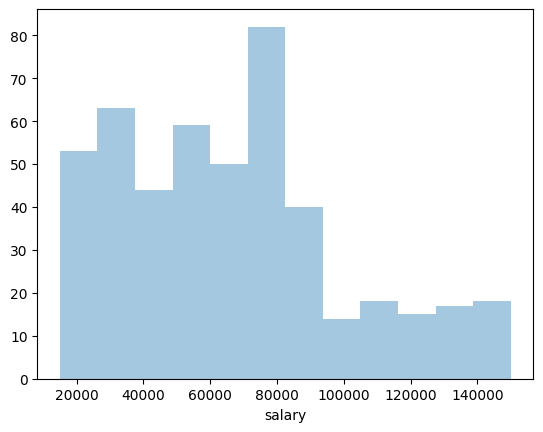

In [115]:
# Distribution of customers by salary
salary_counts = customer_df['salary'].value_counts()
print(salary_counts)

# Visualization of distribution of customers by salary
sns.distplot(customer_df['salary'], kde=False)
plt.show()

# 4. Purchase behavior by gender and age

age      16   17    18   19   20   21   22   23   24   25  ...   51   52   53  \
gender                                                     ...                  
Female  1.0  6.0  13.0  NaN  5.0  0.0  1.0  0.0  0.0  NaN  ...  1.0  2.0  3.0   
Male    NaN  9.0   1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  NaN  1.0  1.0   

age      54   55   56   57   58   59   60  
gender                                     
Female  2.0  2.0  2.0  1.0  3.0  2.0  2.0  
Male    1.0  NaN  2.0  2.0  1.0  2.0  2.0  

[2 rows x 45 columns]


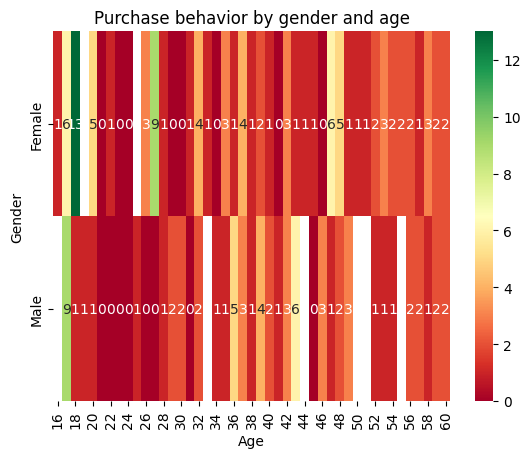

In [116]:
# Purchase behavior by gender and age
purchase_by_gender_age = customer_df.groupby(['gender', 'age'])['purchased'].sum().unstack()
print(purchase_by_gender_age)

# Visualization of purchase behavior by gender and age
sns.heatmap(purchase_by_gender_age, annot=True, fmt='.0f', cmap='RdYlGn')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.title ('Purchase behavior by gender and age')
plt.show()


# 5. What is the distribution of customers by city?

Paris             35
London            34
Tokyo             34
Moscow            31
New York          29
Sydney            25
Istanbul          19
Mumbai            16
Cairo             16
Bangkok           16
Rio de Janeiro    16
Vienna            12
Toronto           12
Beijing           10
Prague             6
Kuala Lumpur       6
Oslo               6
Brussels           6
Athens             6
Stockholm          6
Dublin             6
Helsinki           6
Zurich             6
Jakarta            6
Copenhagen         6
Lisbon             6
Singapore          6
Taipei             6
Buenos Aires       6
Warsaw             6
Amsterdam          6
Santiago           6
Manila             6
Hong Kong          6
Berlin             6
Rome               6
Madrid             6
Mexico City        6
Seoul              6
Johannesburg       6
Dubai              6
New York City      6
Name: city, dtype: int64


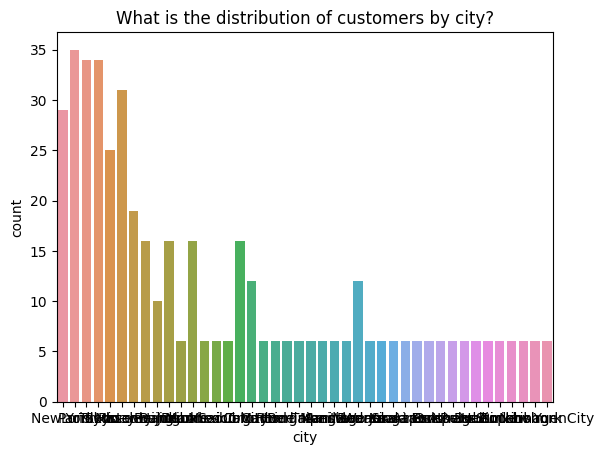

In [117]:
# Distribution of customers by city
city_counts = customer_df['city'].value_counts()
print(city_counts)

# Visualization of distribution of customers by city
sns.countplot(x='city', data=customer_df)
plt.title ('What is the distribution of customers by city?')
plt.show()

# 6. What is the distribution of customers by country?

In [118]:
import plotly.express as px

# Create a new dataframe with the count of customers by country
country_counts = customer_df.groupby(['country', 'lat', 'lon']).size().reset_index()
country_counts.columns = ['country', 'lat', 'lon', 'count']

# Create a scatter map
fig = px.scatter_mapbox(data_frame=country_counts,
                    lat='lat',
                    lon='lon',
                    color='count',
                    size='count',
                    hover_name='country',
                    title='Distribution of Customers by Country')
fig.show()


# 7. What is the correlation between age, salary and purchase behavior?
---

                age    salary  purchased
age        1.000000  0.646747   0.379579
salary     0.646747  1.000000   0.488944
purchased  0.379579  0.488944   1.000000


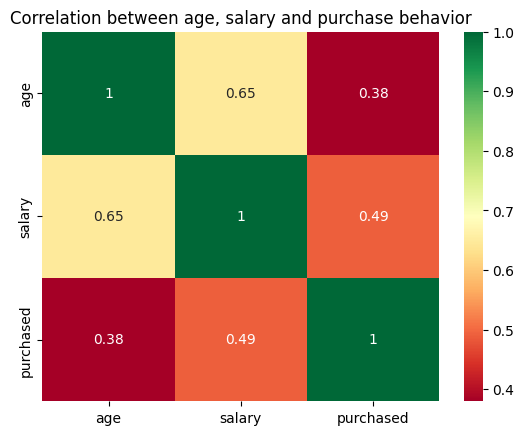

In [119]:
# Correlation between age, salary and purchase behavior
corr = customer_df[['age', 'salary', 'purchased']].corr()
print(corr)

# Visualization of correlation between age, salary and purchase behavior
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.title('Correlation between age, salary and purchase behavior')
plt.show()


# 8. What is the average salary of customers who have made a purchase?

In [120]:
# Average salary of customers who have made a purchase
purchased_df = customer_df[customer_df['purchased'] == 1]
average_salary = purchased_df['salary'].mean()
rounded_average_salary = round(average_salary)
formatted_average_salary = "${:,.2f}".format(rounded_average_salary)
print(formatted_average_salary)


$88,768.00


# 9. How many customers from each city have made a purchase?

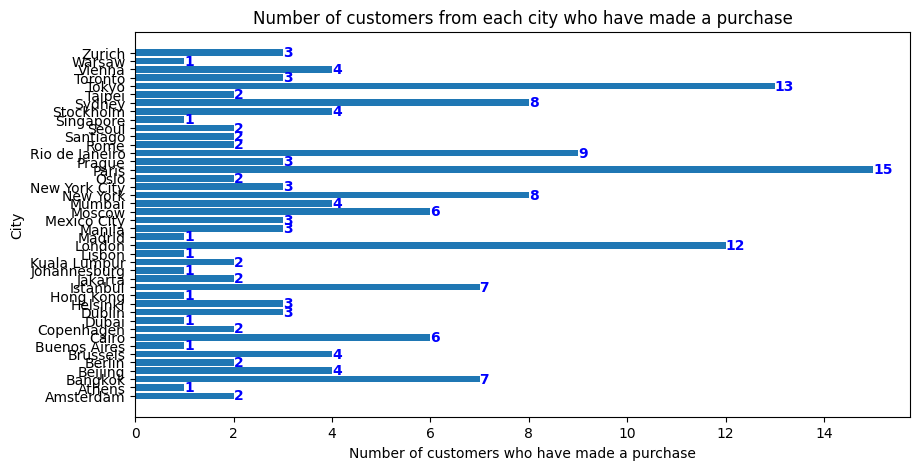

In [121]:
# Number of customers from each city who have made a purchase
import matplotlib.pyplot as plt

# Number of customers from each city who have made a purchase
purchase_by_city = customer_df[customer_df['purchased'] == 1].groupby(['city']).size()

# Visualization of purchase by city
plt.figure(figsize=(10,5))
plt.barh(purchase_by_city.index, purchase_by_city.values)
plt.xlabel("Number of customers who have made a purchase")
plt.ylabel("City")
plt.title("Number of customers from each city who have made a purchase")

# Add the values at the top of the bars
for i, v in enumerate(purchase_by_city.values):
    plt.text(v, i, str(v), color='blue', va='center', fontweight='bold')

plt.show()


# 10. How has the purchase behavior of customers changed over time?

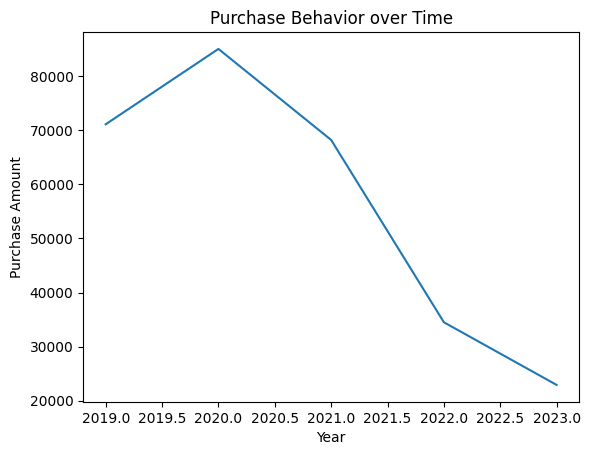

In [122]:
# Create a new column for the purchase year
customer_df['purchase_year'] = pd.to_datetime(customer_df['date']).dt.year

# Group the customers by the purchase year and purchase amount
purchase_by_year = customer_df.groupby(['purchase_year'])['purchase_amount'].sum()

# Create a line plot
plt.plot(purchase_by_year.index, purchase_by_year.values)
plt.xlabel("Year")
plt.ylabel("Purchase Amount")
plt.title("Purchase Behavior over Time")
plt.show()


# 11. Which cohort of customers has the highest retention rate?

In [123]:
# Create a new column for the cohort (i.e. the month of the first purchase)
customer_df['cohort'] = pd.to_datetime(customer_df['date']).dt.to_period('M')

# Create a new column for the purchase month
customer_df['purchase_month'] = pd.to_datetime(customer_df['date']).dt.to_period('M')

# Group the customers by the cohort and purchase month
cohort_size = customer_df.groupby(['cohort','purchase_month']).size()

#Calculate retention rate
retention_rate = cohort_size.unstack(level=1)/cohort_size.sum()

#print the cohort with highest retention
cohort_with_highest_retention = retention_rate.idxmax(axis=1)
print(cohort_with_highest_retention)


cohort
2019-01    2019-01
2019-02    2019-02
2019-03    2019-03
2019-04    2019-04
2019-05    2019-05
2019-06    2019-06
2019-07    2019-07
2019-08    2019-08
2019-09    2019-09
2019-10    2019-10
2019-11    2019-11
2019-12    2019-12
2020-01    2020-01
2020-02    2020-02
2020-03    2020-03
2020-04    2020-04
2020-05    2020-05
2020-06    2020-06
2020-07    2020-07
2020-08    2020-08
2020-09    2020-09
2020-10    2020-10
2020-11    2020-11
2020-12    2020-12
2021-01    2021-01
2021-02    2021-02
2021-03    2021-03
2021-04    2021-04
2021-05    2021-05
2021-06    2021-06
2021-07    2021-07
2021-08    2021-08
2021-09    2021-09
2021-10    2021-10
2021-11    2021-11
2021-12    2021-12
2022-10    2022-10
2022-11    2022-11
2022-12    2022-12
2023-01    2023-01
Freq: M, dtype: period[M]


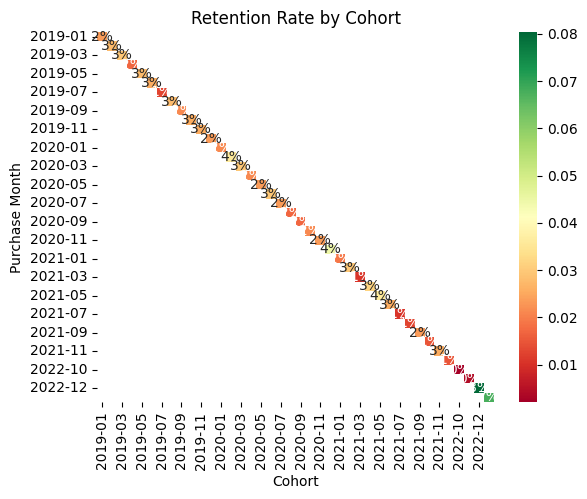

In [124]:
# Plot the retention rate
sns.heatmap(retention_rate.T,annot=True, fmt='.0%', cmap='RdYlGn')
plt.title("Retention Rate by Cohort")
plt.xlabel("Cohort")
plt.ylabel("Purchase Month")
plt.show()


# 12. How does the purchase amount vary with age group?

age_group
Young          627.829268
Middle-aged    564.053140
Senior         528.800000
Name: purchase_amount, dtype: float64


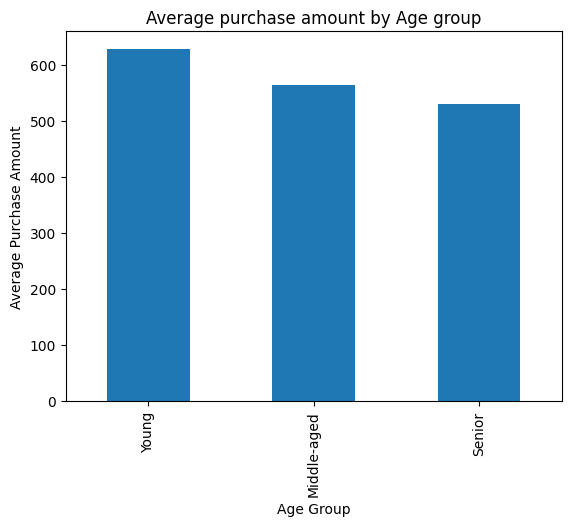

In [125]:
# create a new column for age group
import numpy as np

customer_df['age_group'] = pd.cut(customer_df['age'], bins=[0, 30, 55, 100], labels=['Young', 'Middle-aged', 'Senior'])

# group the customer dataframe by age group and calculate the average purchase amount
average_purchase_amount_by_age_group = customer_df.groupby(['age_group'])['purchase_amount'].mean()
print(average_purchase_amount_by_age_group)

# plot the average purchase amount by age group
average_purchase_amount_by_age_group.plot(kind='bar', xlabel='Age Group', ylabel='Average Purchase Amount')
plt.title('Average purchase amount by Age group')
plt.show()


# 13. How does the purchase amount vary with salary group?

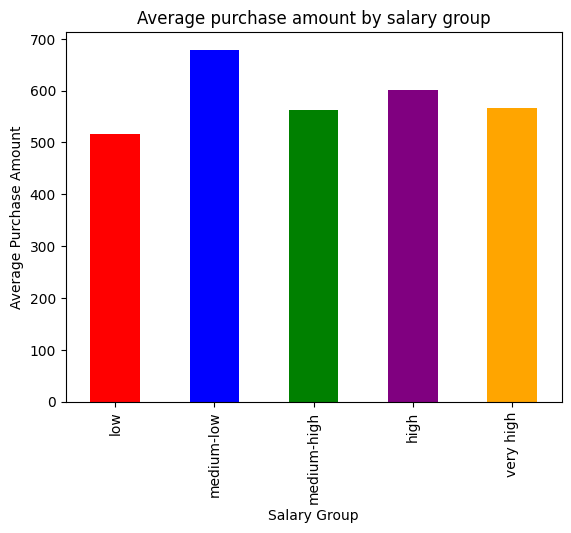

In [126]:
# create a new column for salary group
customer_df['salary_group'] = pd.cut(customer_df['salary'], bins=[0, 25000, 50000, 75000, 100000, 100000000], labels=['low', 'medium-low', 'medium-high', 'high', 'very high'])

# group the customer dataframe by salary group and calculate the average purchase amount 
average_purchase_amount_by_salary_group = customer_df.groupby(['salary_group'])['purchase_amount'].mean()

# plot the average purchase amount by salary group
ax = average_purchase_amount_by_salary_group.plot(kind='bar', color=['red', 'blue', 'green', 'purple', 'orange'], xlabel='Salary Group', ylabel='Average Purchase Amount')
plt.title('Average purchase amount by salary group')
plt.show()


# 14. Are there any segments of customers that exhibit particularly high or low purchase amounts?
One way to segment customers based on their purchase amount is by using k-means clustering.

In [127]:
from sklearn.cluster import KMeans

# select purchase amount as the feature to cluster on
X = customer_df[['purchase_amount']]

# fit the KMeans model to the data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# assign the cluster labels to the customers
customer_df['purchase_amount_cluster'] = kmeans.labels_

# calculate the mean purchase amount for each cluster
cluster_mean_purchase_amount = customer_df.groupby(['purchase_amount_cluster'])['purchase_amount'].mean()

print(cluster_mean_purchase_amount)


purchase_amount_cluster
0    250.413333
1    944.870130
2    584.076923
Name: purchase_amount, dtype: float64


c:\Users\euzoe\ANACONDA\envs\eddy\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



# Visualize the k-means cluster

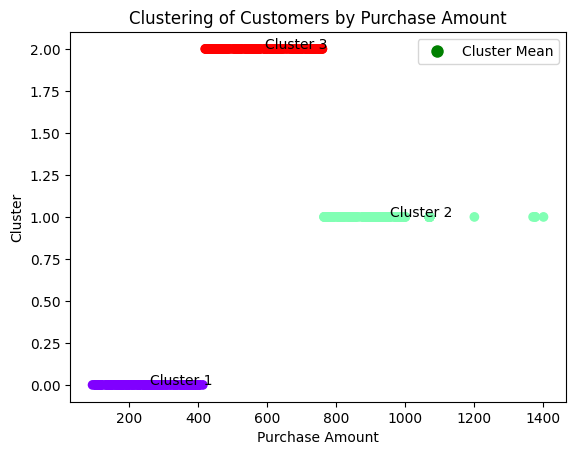

In [128]:
import matplotlib.pyplot as plt
from matplotlib.legend import Line2D


# Create a scatter plot of purchase amount by cluster
plt.scatter(customer_df['purchase_amount'], customer_df['purchase_amount_cluster'], c=customer_df['purchase_amount_cluster'], cmap='rainbow')

# Add the cluster means as text on the plot
for i in range(3):
    plt.text(cluster_mean_purchase_amount.loc[i]+10, i, f'Cluster {i+1}')

# Add axis labels and a title
plt.xlabel('Purchase Amount')
plt.ylabel('Cluster')
plt.title('Clustering of Customers by Purchase Amount')

# Add a legend to indicate the cluster means
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster Mean', markerfacecolor='g', markersize=10)]
plt.legend(handles=legend_elements)
plt.show()
